In [1]:
import skimage.io
import os
from matplotlib import pyplot as plt

file_name = 'peter_snow.jpg'
if not os.access(file_name, os.R_OK):
    file_URL = 'http://www.zooclub.ru/attach/26000/26132.jpg'
    os.system('wget ' + file_URL)

img = skimage.io.imread(file_name)

In [2]:
import torchvision

# get model
resnet_18 = torchvision.models.resnet18(pretrained=True)
resnet_18.eval();

In [3]:
# get classes
file_name = 'synset_words.txt'
if not os.access(file_name, os.W_OK):
    synset_URL = 'https://github.com/szagoruyko/functional-zoo/raw/master/synset_words.txt'
    os.system('wget ' + synset_URL)

classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ', 1)[1].split(', ', 1)[0])
classes = tuple(classes)

In [4]:
from torchvision import transforms as trn

# define image transformation
centre_crop = trn.Compose([
        trn.ToPILImage(),
        trn.Resize(256),
        trn.CenterCrop(224),
        trn.ToTensor(),
        trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

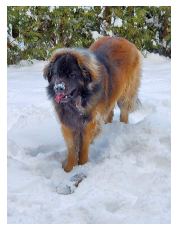

0.980 -> Leonberg
0.013 -> Tibetan mastiff
0.004 -> chow
0.002 -> Saint Bernard
0.001 -> Newfoundland


In [5]:
import warnings  # Fix for warning bug in PyTorch 1.9.0
warnings.filterwarnings("ignore", category=UserWarning) 

import torch
from torch.autograd import Variable as V
from torch.nn import functional as f

plt.imshow(img); plt.axis('off'); plt.show()

# get top 5 probabilities
with torch.no_grad():
    x = V(centre_crop(img).unsqueeze(0))
    logit = resnet_18(x)
    h_x = f.softmax(logit, -1).data.squeeze()
    probs, idx = h_x.sort(0, True)
    for i in range(0, 5):
        print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))